In [214]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.naive_bayes import GaussianNB
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import root_mean_squared_error
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
random.seed(123)

In [215]:
houses_df = pd.read_csv('train.csv')

In [216]:
null_counts = houses_df.isnull().sum()
# print(null_counts)
null_counts = null_counts[null_counts > 0]
print(null_counts)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [217]:
for i in null_counts.index:
    print(i)
    houses_df = houses_df.apply(pd.to_numeric, errors='coerce')
    houses_df = houses_df.fillna(0)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


<Axes: >

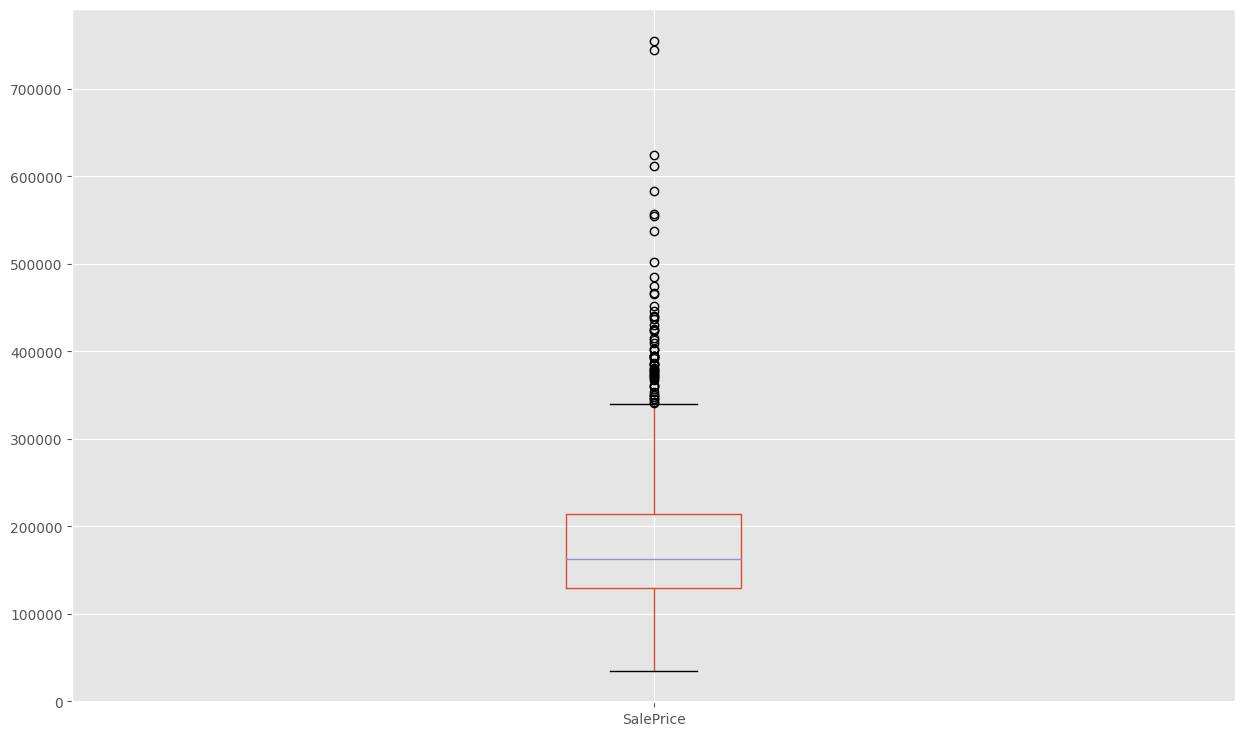

In [218]:
houses_df[["SalePrice"]].boxplot()

In [219]:
houses_df = houses_df[houses_df["SalePrice"] < 700000]
houses_df = houses_df[houses_df["LotArea"] < 100000]

In [220]:
# Define the target
y = houses_df.pop('SalePrice')

# Remove the target from the current DataFrame
X = houses_df
random.seed(1234)

In [221]:

X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [222]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(houses_df)
categorical_columns = categorical_columns_selector(houses_df)

In [223]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standar-scaler', numerical_preprocessor,numerical_columns)
    ])

In [224]:
#param_grid = {"max_depth": np.arange(2, 10, 1)}
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('regressor',GaussianNB())])
#params = [{
#    "regressor__max_depth": np.arange(2, 10, 1)
#}]
pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('one-hot-encoder',
                                    OneHotEncoder(handle_unknown='ignore'), []),
                                   ('standar-scaler', StandardScaler(),
                                    ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage',
                                     'LotArea', 'Street', 'Alley', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'OverallQual', 'OverallCond', 'YearBuilt',
                                     'YearRemodAdd', 'RoofStyle', 'RoofMatl',
                                     'Exterior1st', 'Exterior2nd', 'MasVnrType',
                                     'MasVnrArea', 'ExterQual', 'ExterCond',
                                 

In [225]:
modelo = pipeline.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
rmse = root_mean_squared_error(y_test,y_pred)
rmse

48638.19561748241

In [226]:
params =  [{
    "regressor__var_smoothing": np.logspace(0,-9, num=100)
}]
modelo = GridSearchCV(pipeline,param_grid=params,n_jobs=2, cv=5,scoring="neg_root_mean_squared_error")
modelo.fit(X_train,y_train)
modelo.best_params_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'regressor__var_smoothing': 1.0}

In [227]:
print(modelo.best_estimator_)
print('best score:')
print(modelo.best_score_)
y_mejor_pred = modelo.best_estimator_.predict(X_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standar-scaler',
                                                  StandardScaler(),
                                                  ['Id', 'MSSubClass',
                                                   'MSZoning', 'LotFrontage',
                                                   'LotArea', 'Street', 'Alley',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyl

In [228]:
minimo = y.min()
print("Valor mínimo: ", minimo)
maximo = y.max()
print("Valor máximo: ", maximo)

std_dev = np.std(y)
print("Desviación estándar: ", std_dev)

rmse_tunned = root_mean_squared_error(y_test,y_mejor_pred)
print("Valor RMSE: ", rmse_tunned)

Valor mínimo:  34900
Valor máximo:  625000
Desviación estándar:  76434.20276151803
Valor RMSE:  38975.10918484067
